In [187]:
from astropy.io import fits
import numpy as np
from scipy import log10
import pandas as pd
from astropy.coordinates import SkyCoord
from astropy import wcs, units
from matplotlib import pylab as plt

In [183]:
visual =pd.read_csv("/Users/themba/Documents/MSc/Thesis/Catalogue/FINAL_PRODUCT/Visual-catalog", sep='\t')
peak = open("/Users/themba/Documents/MSc/Thesis/Catalogue/FINAL_PRODUCT/peak_flux_visual",'r').readlines()
coord,Peak=[],[]
for line in peak:
    n,p =line.split()
    coord.append(n)
    Peak.append(float(p))

In [136]:
def HnD(j):
    hdu = fits.open('/Volumes/Themba/MSc/Real/ppmosALL_'+str(j)+'_kms.fits')
    Header = hdu[0].header
    cube = hdu[0].data
    Header.set('ctype3', 'velo')
    w = wcs.WCS(Header)
    return cube, w

In [132]:
def Gal2Eqx2Pix(lat,lon,vel,w):
    J=SkyCoord("galactic", l=str(lat)+"deg", b=str(lon)+"deg")
    Y=(J.fk5).to_string()
    ra1,dec1=Y.split()
    ra,dec=float(ra1),float(dec1)

    x,y,z = w.all_world2pix(ra,  dec, vel, 0)
    return int(round(x)),int(round(y)),int(round(z))

In [ ]:
for i in range(186,187):
    line = visual[visual.index==i]
    j=line.ppmos.values[0]
    l=line.l.values[0]
    b=line.b.values[0]
    vel=line.vel.values[0]
    data,w = HnD(j)
    x,y,z=Gal2Eqx2Pix(l,b,vel,w)
    cube = data[z-10:z+10,y-5:y+5,x-5:x+5]
    print i, str(x)+':'+str(y)+':'+str(z),' Peak= '+str(np.max(cube)*1e3)
        

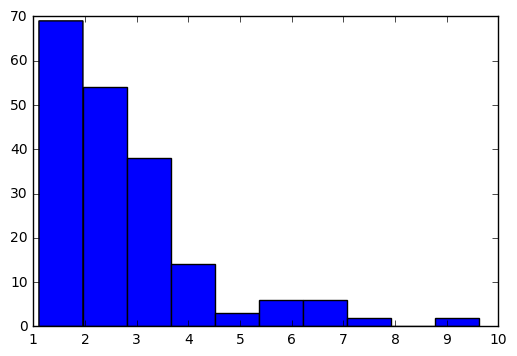

In [234]:
plt.hist(visual.Peak,bins=10)
#plt.xticks(np.arange(-.2,1.2,.2))
#plt.ylim(0,45)
#plt.xlim(-0.1,1.1)
plt.show()

In [214]:
log10(visual.Peak.min()),log10(visual.Peak.max())

(0.044853217267731532, 0.98355412420626043)

#### 